## Importing Data

In [1]:
import numpy as np
import pandas as pd
import yfinance 

In [2]:
# Ignoring warning messages
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Getting the current date
from datetime import date

In [4]:
today = date.today()
today

datetime.date(2020, 7, 15)

In [5]:
# Using the .download() method to get our data

raw_data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^GDAXI", #The time series we are interested in - (in our case, these are the S&P, FTSE, NIKKEI and DAX)
                              start = "1994-01-07", #The starting date of our data set
                              end = today, #The ending date of our data set (at the time of upload, this is the current date)
                              interval = "1d", #The distance in time between two recorded observations. Since we're using daily closing prices, we set it equal to "1d", which indicates 1 day. 
                              group_by = 'ticker', #The way we want to group the scraped data. Usually we want it to be "ticker", so that we have all the information about a time series in 1 variable.
                              auto_adjust = True, #Automatically adjuss the closing prices for each period. 
                              treads = True) #Whether to use threads for mass downloading. 

[*********************100%***********************]  4 of 4 completed


In [6]:
# Creating a back up copy in case we remove/alter elements of the data by mistake
df_comp = raw_data.copy()

In [7]:
# Adding new columns to the data set
df_comp['spx'] = df_comp['^GSPC'].Close
df_comp['dax'] = df_comp['^GDAXI'].Close
df_comp['ftse'] = df_comp['^FTSE'].Close
df_comp['nikkei'] = df_comp['^N225'].Close

In [8]:
df_comp = df_comp.iloc[1:] # Removing the first elements, since we always start 1 period before the first, due to time zone differences of closing prices
del df_comp['^N225']  # Removing the original tickers of the data set
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp=df_comp.asfreq('b') # Setting the frequency of the data
df_comp=df_comp.fillna(method='ffill') # Filling any missing values

In [9]:
print (df_comp.head()) # Displaying the first 5 elements to make sure the data was scrapped correctly
print (df_comp.tail()) # Making sure of the last day we're including in the series

                   spx          dax         ftse        nikkei
                                                              
Date                                                          
1994-01-07  469.899994  2224.949951  3446.000000  18124.009766
1994-01-10  475.269989  2225.000000  3440.600098  18443.439453
1994-01-11  474.130005  2228.100098  3413.800049  18485.250000
1994-01-12  474.170013  2182.060059  3372.000000  18793.880859
1994-01-13  472.470001  2142.370117  3360.000000  18577.259766
                    spx           dax         ftse        nikkei
                                                                
Date                                                            
2020-07-08  3169.939941  12494.809570  6156.200195  22438.650391
2020-07-09  3152.050049  12489.459961  6049.600098  22529.289062
2020-07-10  3185.040039  12633.709961  6095.399902  22290.810547
2020-07-13  3155.219971  12799.969727  6176.200195  22784.740234
2020-07-14  3197.520020  12697.360352  61

In [10]:
df_comp.columns

MultiIndex([(   'spx', ''),
            (   'dax', ''),
            (  'ftse', ''),
            ('nikkei', '')],
           )

In [11]:
df_comp.describe

<bound method NDFrame.describe of                     spx           dax         ftse        nikkei
                                                                
Date                                                            
1994-01-07   469.899994   2224.949951  3446.000000  18124.009766
1994-01-10   475.269989   2225.000000  3440.600098  18443.439453
1994-01-11   474.130005   2228.100098  3413.800049  18485.250000
1994-01-12   474.170013   2182.060059  3372.000000  18793.880859
1994-01-13   472.470001   2142.370117  3360.000000  18577.259766
...                 ...           ...          ...           ...
2020-07-08  3169.939941  12494.809570  6156.200195  22438.650391
2020-07-09  3152.050049  12489.459961  6049.600098  22529.289062
2020-07-10  3185.040039  12633.709961  6095.399902  22290.810547
2020-07-13  3155.219971  12799.969727  6176.200195  22784.740234
2020-07-14  3197.520020  12697.360352  6179.799805  22587.009766

[6918 rows x 4 columns]>

In [12]:
df_comp.isna().sum()

spx         0
dax         0
ftse        0
nikkei      0
dtype: int64

In [13]:
# while dealing with huge database and you want to analyse only one column
df_comp.spx.isna().sum()

0

## Plotting the Data

In [14]:
import matplotlib.pyplot as plt

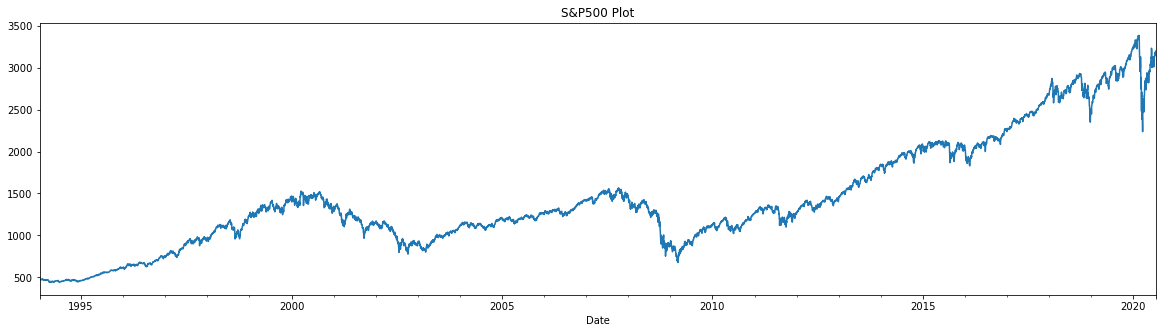

In [15]:
df_comp.spx.plot(figsize = (20,5), title = "S&P500 Plot")
plt.show()

# Here the y-axis has the values of the column spx and the x-axis has the numbers associated with
# dates which is also the index of the dataset.

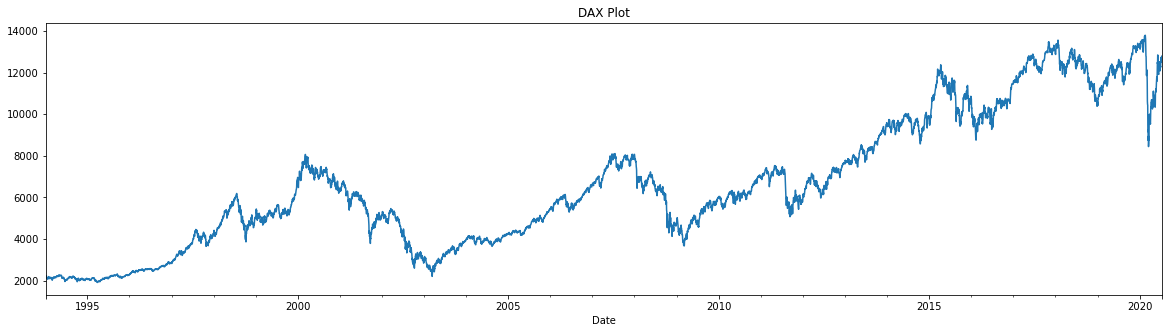

In [16]:
df_comp.dax.plot(figsize = (20,5), title = "DAX Plot")
plt.show()

# Here the y-axis has the values of the column spx and the x-axis has the numbers associated with
# dates which is also the index of the dataset.

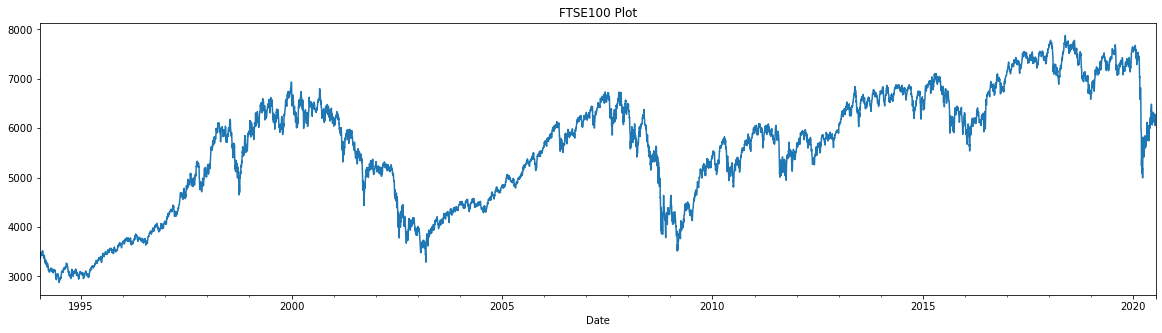

In [17]:
df_comp.ftse.plot(figsize = (20,5), title = "FTSE100 Plot")
plt.show()

# Here the y-axis has the values of the column spx and the x-axis has the numbers associated with
# dates which is also the index of the dataset.

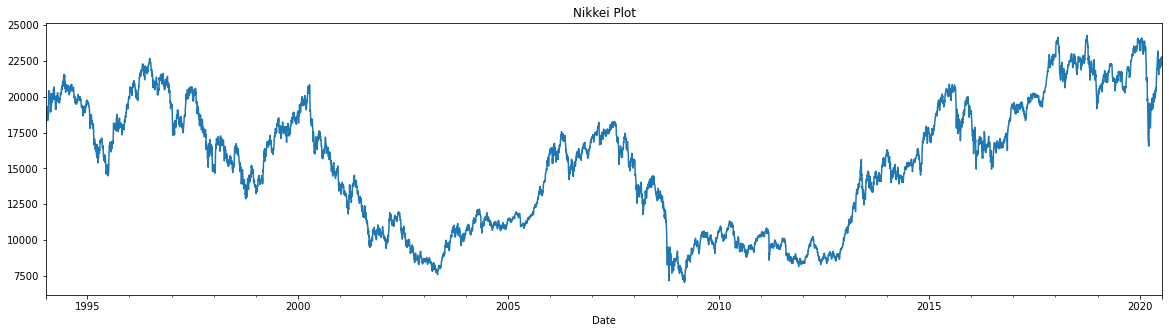

In [18]:
df_comp.nikkei.plot(figsize = (20,5), title = "Nikkei Plot")
plt.show()

# Here the y-axis has the values of the column spx and the x-axis has the numbers associated with
# dates which is also the index of the dataset.

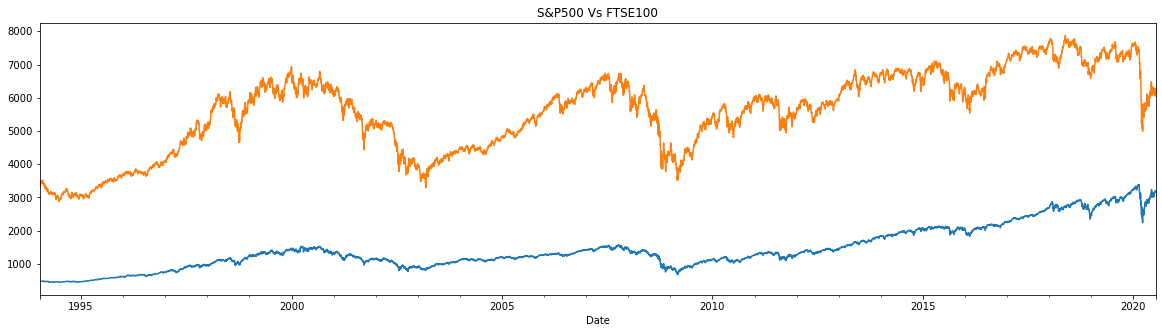

In [19]:
df_comp.spx.plot(figsize = (20,5), title = "S&P500 Plot")
df_comp.ftse.plot(figsize = (20,5), title = "FTSE100 Plot")
plt.title("S&P500 Vs FTSE100")
plt.show()

## The QQ Plot

A QQ plot is used to determine whether a dataset is distributed in a certain way.
A QQ plot also showcases how the data fits the normal distribution.

In [20]:
import scipy.stats
import pylab

In [21]:
df_comp.columns

MultiIndex([(   'spx', ''),
            (   'dax', ''),
            (  'ftse', ''),
            ('nikkei', '')],
           )

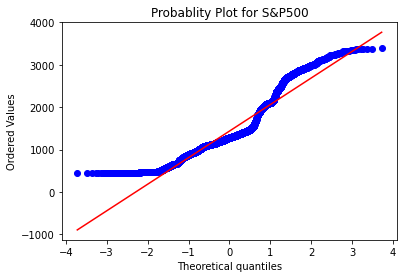

In [22]:
scipy.stats.probplot(df_comp.spx, plot = pylab)
pylab.title("Probablity Plot for S&P500")
pylab.show()

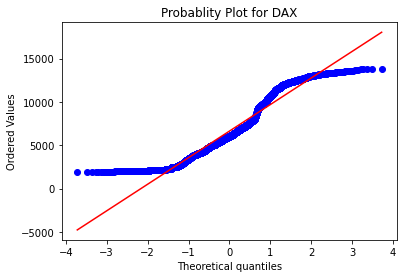

In [23]:
scipy.stats.probplot(df_comp.dax, plot = pylab)
pylab.title("Probablity Plot for DAX")
pylab.show()

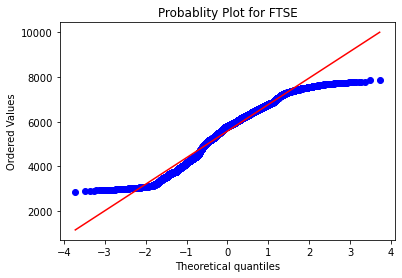

In [24]:
scipy.stats.probplot(df_comp.ftse, plot = pylab)
pylab.title("Probablity Plot for FTSE")
pylab.show()

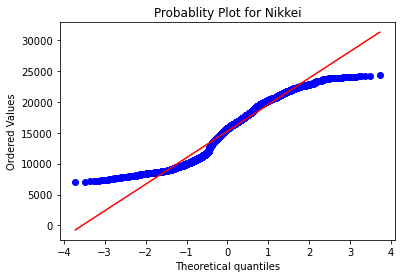

In [25]:
scipy.stats.probplot(df_comp.nikkei, plot = pylab)
pylab.title("Probablity Plot for Nikkei")
pylab.show()

Here in the theoretical quantiles, 0 is the mean. The probablity plot distributes the data on the quantiles. We can clearly see that the data is not distributed in the normal distribution format.The data points must follow the red line if they are supposed to be normally distributed.

## Length of the Time Period

Time is important in time series analysis. Now we will transform a dataframe into a time series.

In [26]:
df_comp.describe()

,spx,dax,ftse,nikkei
,,,,
count,6918.000000,6918.000000,6918.000000,6918.000000
mean,1435.116429,6637.616311,5579.581554,15266.538554
std,655.648259,3157.799925,1207.534605,4401.209321
min,438.920013,1911.699951,2876.600098,7054.979980
25%,1040.752441,4224.299805,4672.674805,10978.357178
50%,1278.309998,6046.465088,5795.550049,15704.455078
75%,1781.890015,8993.447510,6472.075073,18977.903320
max,3386.149902,13789.000000,7877.500000,24270.619141


Here the data column is not included as it is being read as the text column and not the number column.

In [27]:
#df_comp.Date.describe()

## Text Date to TimeStamp

In [28]:
#df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)

In [29]:
#df_comp.head()

In [30]:
#df_comp.date.describe()

## Setting up the Index

Each value should correspond to a time period. We often wish to examine specific chunks of data between 2 concrete dates. Seperating the data before and after 15th September 2008 (This is the day when Lehmann Brothers filed for Bankruptcy). We need to use the associated time periods as indices.

In [31]:
#df_comp.set_index("date", inplace = True)

In [32]:
#df_comp.head()

## Setting the Desired Frequency

In [33]:
#df_comp = df_comp.asfreq("b")

# asfreq method can have values "h", "w", "d", "m" which denotes hourly, weekly, daily and monthly
# respectively. Data measured once per year is "annual" so we use "a" and not "y" for yearly.
# In stock market weekends are holidays so we do not use "d" parameter, we use "b" i.e. business days.

In [34]:
#df_comp.head()

We generated some data periods for which the data is unavailable.

## Handling Missing Values

In [35]:
df_comp.isna().sum()

spx         0
dax         0
ftse        0
nikkei      0
dtype: int64

So we have 8 missing values in all the columns

In [36]:
# df_comp.spx = df_comp.spx.fillna(method = "ffill")

# Here we have used the parameter ffill, means front fill.

In [37]:
# df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean())

# Here we have used the function mean, which means that the mean value will be filled.

In [38]:
# df_comp.ftse = df_comp.ftse.fillna(method = "bfill")

# Here we have used the back filled method.

In [39]:
# df_comp.nikkei = df_comp.nikkei.fillna(method = "ffill")

# Here we have used the parameter ffill, means front fill.

In [40]:
# df_comp.isna().sum()

## Simplifying the DataSet

In [41]:
df_comp.head()

,spx,dax,ftse,nikkei
,,,,
Date,,,,
1994-01-07,469.899994,2224.949951,3446.000000,18124.009766
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859
1994-01-13,472.470001,2142.370117,3360.000000,18577.259766


In [42]:
df_comp['market_value'] = df_comp.spx

In [43]:
df_comp.head()

,spx,dax,ftse,nikkei,market_value
,,,,,
Date,,,,,
1994-01-07,469.899994,2224.949951,3446.000000,18124.009766,469.899994
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453,475.269989
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000,474.130005
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859,474.170013
1994-01-13,472.470001,2142.370117,3360.000000,18577.259766,472.470001


In [44]:
col = ["spx", "dax", "ftse", "nikkei"]

for x in col:
    del df_comp[x]

In [45]:
df_comp.head()

,market_value
,
Date,
1994-01-07,469.899994
1994-01-10,475.269989
1994-01-11,474.130005
1994-01-12,474.170013
1994-01-13,472.470001


In [46]:
df_comp.describe()

,market_value
,
count,6918.000000
mean,1435.116429
std,655.648259
min,438.920013
25%,1040.752441
50%,1278.309998
75%,1781.890015
max,3386.149902


## Test-Train Split

We are going to use 80-20 train-test split. In time series analysis the split is performed sequentially. We do not split the data using other python methods because they split the data randomly.

In [47]:
train_size = int(len(df_comp)*0.8)

In [48]:
df = df_comp.iloc[: train_size]

In [49]:
df_test = df_comp.iloc[train_size :]

In [50]:
df.tail()

,market_value
,
Date,
2015-03-19,2089.270020
2015-03-20,2108.100098
2015-03-23,2104.419922
2015-03-24,2091.500000
2015-03-25,2061.050049


In [51]:
df_test.head()

,market_value
,
Date,
2015-03-26,2056.149902
2015-03-27,2061.020020
2015-03-30,2086.239990
2015-03-31,2067.889893
2015-04-01,2059.689941


In [52]:
# testing the test set for latest data
df_test.tail()

,market_value
,
Date,
2020-07-08,3169.939941
2020-07-09,3152.050049
2020-07-10,3185.040039
2020-07-13,3155.219971
2020-07-14,3197.520020


## White Noise

White noise is a term used in the time series when the previous pattern is not at all comparable with the further patterns. 

In [53]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

# Here wn is the series based on the scale of market_value and has the same size of market_value but
# its distribution is normal

In [54]:
df['wn'] = wn

# Adding white noise as the column in the dataframe

In [55]:
df.head()

,market_value,wn
,,
Date,,
1994-01-07,469.899994,427.918892
1994-01-10,475.269989,1639.708455
1994-01-11,474.130005,1172.320520
1994-01-12,474.170013,1169.787224
1994-01-13,472.470001,1163.107730


In [56]:
df.describe()

,market_value,wn
,,
count,5534.000000,5534.000000
mean,1162.495902,1157.549296
std,359.172043,362.097108
min,438.920013,-148.486080
25%,941.802505,914.637477
50%,1181.710022,1157.127776
75%,1367.147461,1407.245682
max,2117.389893,2682.550058


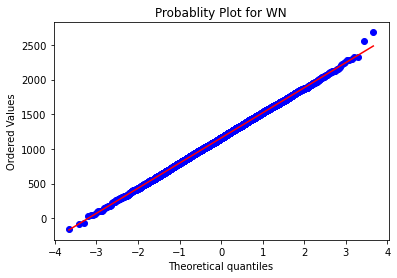

In [57]:
scipy.stats.probplot(df.wn, plot = pylab)
pylab.title("Probablity Plot for WN")
pylab.show()

We can see clearly now the plot is normal in distribution

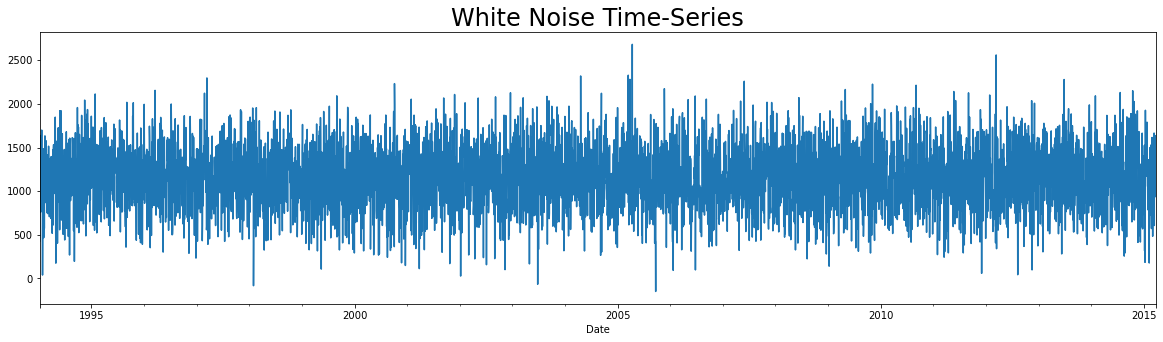

In [58]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size = 24)
plt.show()

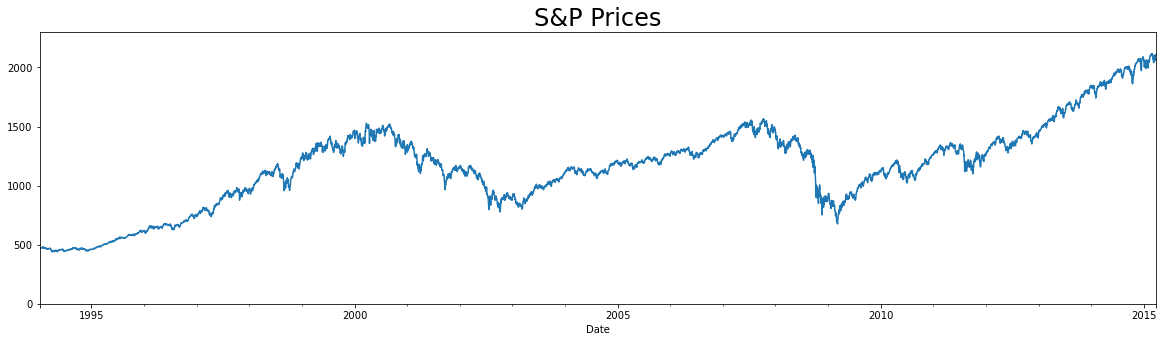

In [59]:
df.market_value.plot(figsize = (20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

## Random Walk
A special type of time series, where values tend to persist over time and the differences between periods are simply white noise.

In [60]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq("b")

In [61]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [62]:
df['rw'] = rw.price

In [63]:
df.head()

,market_value,wn,rw
,,,
Date,,,
1994-01-07,469.899994,427.918892,1122.139662
1994-01-10,475.269989,1639.708455,1080.347860
1994-01-11,474.130005,1172.320520,1082.095245
1994-01-12,474.170013,1169.787224,1083.639265
1994-01-13,472.470001,1163.107730,1067.146255


In [64]:
df.tail()

,market_value,wn,rw
,,,
Date,,,
2015-03-19,2089.270020,1191.471109,NaN
2015-03-20,2108.100098,1248.996781,NaN
2015-03-23,2104.419922,1569.366347,NaN
2015-03-24,2091.500000,1636.984887,NaN
2015-03-25,2061.050049,939.117968,NaN


In [65]:
# We see NaN values, dropping all those rows with NaN values.
df = df[pd.notnull(df['rw'])]

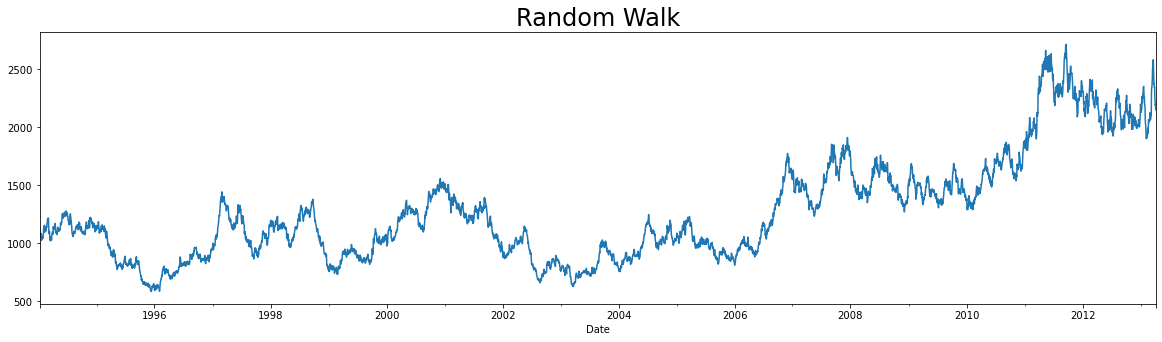

In [66]:
df.rw.plot(figsize = (20,5))
plt.title("Random Walk", size = 24)
plt.show()

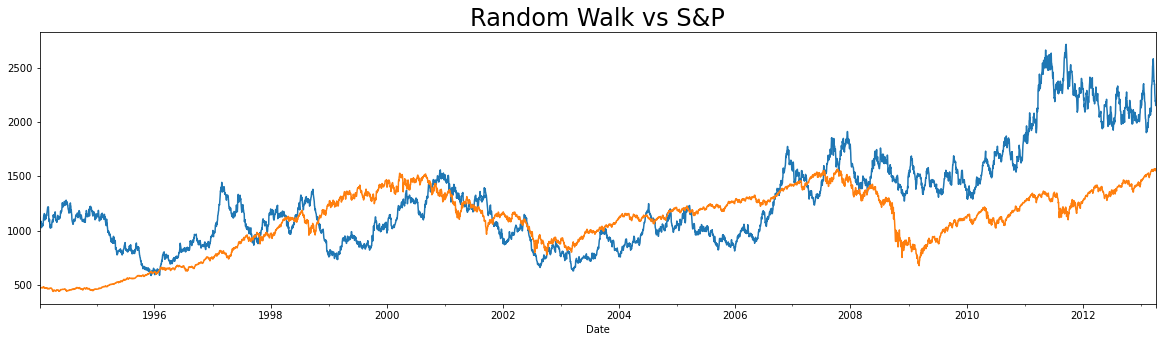

In [67]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

We observe that:
1. Small variations between consecutive time periods.
2. Cyclical increases and decreases in short period of time.

## Market Efficiency

Measures the level of difficulty in forecasting correct future values

If a time series resembles a random walk the prices cannot be predicted with great accuracy. If the future prices can be predicted with great accuracies than we have arbitrage opportunities.

## Arbitrage

When the investors buy and sell commodities and make a safe profit, while the prices adjusts.

## Stationarity

Time series Stationarity implies to taking consecutive samples of data with the same size should have identical covariances regardless of the starting point. This characteristics of the data is also known as "Weak-Form" of stationarity or "covariance" stationarity. The 3 properties required for stationarity are:

1. Constant Mean
2. Constant Covariance
3. Identical covariance of the consecutive samples of data.

For Example:
Cov(x1, x4) = Cov(x3, x6)

A perfect example of Stationarity is White Noise, because of the following reasons:

1. Mean is always zero.
2. Constant Covariance is always there.
3. Correlation between the lags is always zero.

Since, covariance = correlation * standard deviation, covariance will be zero too. White noise really satisfies the covariance stationary process. 

### Strict Stationarity

Where the samples of identical size must have identical distributions. This is very restrictive and we rarely observe it in the natural world. 

So, in analytics, Stationarity = Covariance Stationarity. 


### Determining Weak Form Stationarity in Time Series

It is vital to determine that the data follows a stationary or non-stationary process. Please read more details here https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test

## Stationarity Implementation in Python

In [68]:
import statsmodels.tsa.stattools as sts

# We have imported Augmented Dickey Fuller test here which is a part of statsmodels library.

In [69]:
sts.adfuller(df.market_value)

(-1.7369539896505481,
 0.4121802310084578,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.89644285227)

The above results represents things as follows:

1. The first item is the Test-statistics for running the test. We can compare it to certain critical values which may provide us the proof of stationarity.
2. The 1%, 5%, 10% gives us the test statistic on the respective confidence intervals.
3. The second line of the output gives us the p-value of the t-statistic. This suggest us that there is roughly 90% chance of not rejecting the norm. So we can't confirm that the data is stationary.
4. The third line represents the number of lags used in the regression while detemining the T-statistic. In this case we have 18, so we have some auto correlations going back 18 periods. We will take this into account while picking up the best model.
5. The 4th line represents the number of obeservations used in the analysis. This value depends on the number of lags used in the regression. This usually add up to the size of the dataset.
6. The last line represents the maximized information criteria provided there is some auto-correlation. The lower the values, easier it is to predict the values for the future. 

In the above test the t-statistic (first line) is above all the t-statistic of all the respective confidence intervals, so we do not find any evidence of stationarity in the data (df.market_value).


In [70]:
# Now lets run the test for the white noise data, we know that its stationary
sts.adfuller(df.wn)

(-37.17188833687471,
 0.0,
 3,
 5017,
 {'1%': -3.431654095870046,
  '5%': -2.8621162697870046,
  '10%': -2.5670767490325597},
 72912.108548528)

In the above test the t-statistic (first line) is lower than all the t-statistic of all the respective confidence intervals, so we find evidence for stationarity in the data (df.wn).

In [71]:
# Now lets run the test for the random walk data
sts.adfuller(df.rw)

(-1.328607392768972,
 0.6159849181617384,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

The above result gives us the p-value of 0.62, we don't find evidence of this data of being stationary. We expected this from Random walk and its non stationary most of the times.

## Seasonality

Seasonality suggests that certain trends will appear on cyclical basis. We have an approach to get to know seasonality in the data. One approach is called decomposition of data in 3 effects. Those effects are:

1. Trend: It represents the pattern consistency throughout the data.
2. Seasonal: It represents the cyclical data due to seasonality.
3. Residual: It represents the difference between the actual data and the model we fit.

The simplest kind of decomposition is called "Naive" decomposition. There are 2 types of naive decompostion:
1. Additive: Additive assumes that for any time period the observed value is the sum of the trend, seasonal and residual.
        Additive = Trend + Seasonal + Residual
2. Multiplicative: Multiplicative assumes that for any time period the observed value is the product of the trend, seasonal and residual.
        Multiplicative = Trend * Seasonal * Residual

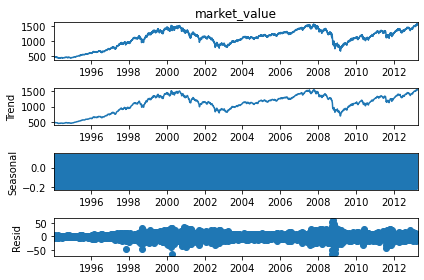

In [72]:
# Now lets run the test for the market_value data
import statsmodels.tsa.seasonal as sea
s_dec_additive = sea.seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

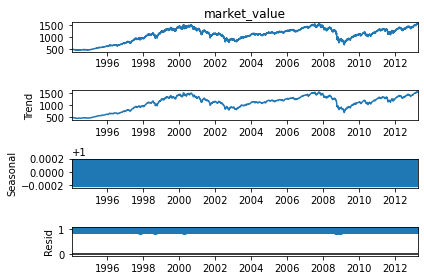

In [73]:
s_dec_multiplicative = sea.seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

## Correlation Vs AutoCorrelation

Correlation: Measures the similarity in the change of the values of the 2 series.
AutoCorrelation: The correlation between the sequence and itself (lagged version).

## The AutoCorrelation Function (ACF)

In time series analysis it is vital to compare autocorrelation values between different lags. The ACF compares the autocorrelation values in the given lags. The ACF show the relationship between past values and the current ones.

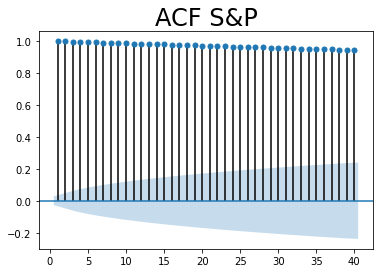

In [74]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

Values on the x-axis represents lags. Numbers on the y-axis represents the possible values of the autocorrelation, correlation values can take the values in range -1 and +1, that is why the graph stops at 1. The thin line across the plot represents the autocorrelation between the time series and the lagged copy of itself. The first line represents autocorrelation 1 time period ago, the second line represents the coefficient values for 2 periods ago. The blue area besides the x-axis represents the "significance". The blue dots represent the significance lag from the significance curve. The greater the distance in time, the more unlikely it is that this autocorrelation persists. For instance today's prices are more closer to yesterday's prices than the prices a month ago.

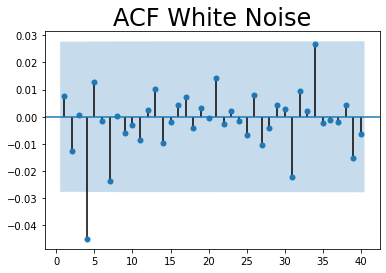

In [75]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF White Noise", size = 24)
plt.show()

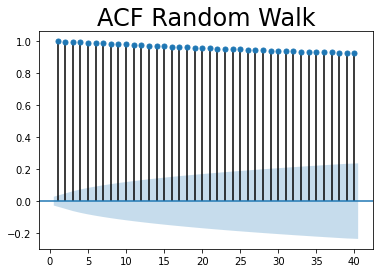

In [76]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF Random Walk", size = 24)
plt.show()

## The Partial Auto-Correlation Function (PACF)

PACF cancels out all the additional channels a previous period value that could affect the present one.

PACF shows the direct effect on today's prices w.r.t. the prices 2 days ago while ACF shows the effect on today's prices w.r.t. 2 days ago, 1 day ago as well as yesterday.

PACF: X(t-2) ---> X(t)

ACF:  X(t-2) ---> X(t-1) ---> X(t)

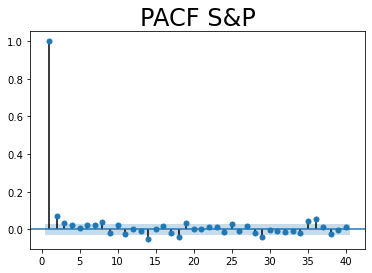

In [77]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = "ols")
# OLS = order of least squares
plt.title("PACF S&P", size = 24)
plt.show()

Notice that the first lag value of ACF and PACF should be identical because there are no other channels through which past values can affect the present values. Also notice that all the values after the 3rd value are mostly within the blue area which is near to 0. 

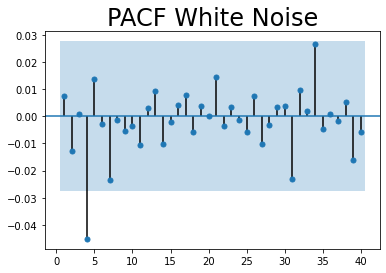

In [78]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = "ols")
# OLS = order of least squares
plt.title("PACF White Noise", size = 24)
plt.show()

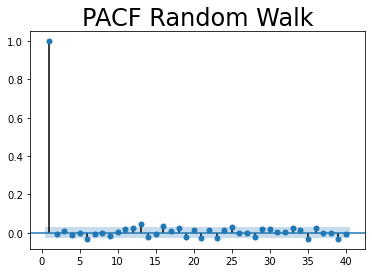

In [79]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = "ols")
# OLS = order of least squares
plt.title("PACF Random Walk", size = 24)
plt.show()

## Picking the correct model in Time Series

We are looking for higher log likelyhood and lower information criteria. We usually follow with the simpler models and expand it to make them more complex. We want our model to be parsimonius in other words as simple as possible. We only go for the complex model only if it provides significantly better predictions. The Log Likelyhood ratio test is the test used to get the prediction performance of the model. We opt for the model with lower AIC and BIC or the coefficients. The residuals of the model should resemble white noise. 

## The AutoRegressive Model (AR)

This model is called autoregressive because it uses a lagged version of itself to conduct regression.

Its a linear model, where current period values are a sum of past outcomes multiplied by a numeric factor. 

            x(t) = C + k * x(t-1) + E(t)
            
x(t-1) represents the value of x during the previous period.

K is the any numeric constant by which we multiply the lagged variable. These coefficient's value is always betwee -1 and +1. If the absolute value of K becomes more than 1 (modulus of K) then it will blow up immeasurably. The later when the things go further the power of the coefficient goes higher and its value goes really high.

E(t) is the residual, its the difference between our prediction for the period "t" and the actual or the correct value.

We first need to determine "how many lags shall we include in our analysis?", More lags will make the model more complicated with more coefficients and they might not be that significant.

### Examining the ACF and PACF of Prices

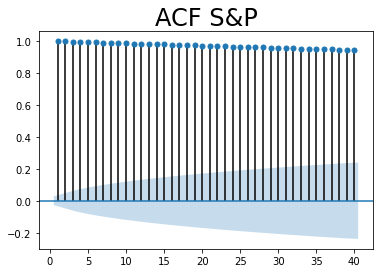

In [80]:
# The ACF plot

sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

We can clearly see that the coefficients fall in between 1 and 0.9.

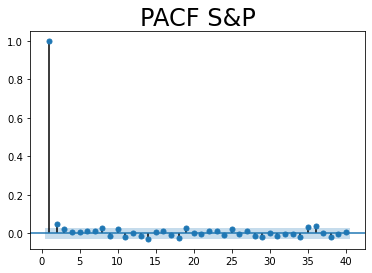

In [81]:
# The PACF plot

sgt.plot_pacf(df.market_value, lags = 40, zero = False)
plt.title("PACF S&P", size = 24)
plt.show()

We can clearly see that coefficients after 20 are very close to zero, so in other words we do not require lags more than 20. So we should be using the PACF to select the current AR model because it shows the individual effect of each past value has on the current one.

## The AR(1) model

In [82]:
import statsmodels.tsa.arima_model as arma

model_ar = arma.ARMA(df.market_value, order = (1, 0))
# Here 1 represents the number of past values we wish to incorporate in our models and 0 represents
# that we are not taking any of the residual values into consideration.
result_ar = model_ar.fit()
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -20097.424
Method:                       css-mle   S.D. of innovations             13.238
Date:                Wed, 15 Jul 2020   AIC                          40200.848
Time:                        13:03:10   BIC                          40220.412
Sample:                    01-07-1994   HQIC                         40207.703
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1057.7648    228.738      4.624      0.000     609.447    1506.083
ar.L1.market_value     0.9994      0.001   1911.190      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
-----------------------------------------------------------------------------
"""

## Fitting a higher-lag AR model

In [83]:
model_ar_2 = arma.ARMA(df.market_value, order = (2, 0))
# Here 2 represents the number of past values we wish to incorporate in our models and 0 represents
# that we are not taking any of the residual values into consideration.
result_ar_2 = model_ar_2.fit()
result_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -20085.295
Method:                       css-mle   S.D. of innovations             13.206
Date:                Wed, 15 Jul 2020   AIC                          40178.591
Time:                        13:03:12   BIC                          40204.676
Sample:                    01-07-1994   HQIC                         40187.732
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1053.4154    249.611      4.220      0.000     564.186    1542.644
ar.L1.market_value     0.9300      0.014     68.026      0.000       0.903       0.957
ar.L2.market_value     0.0694      0.014      5.077      0.000       0.043       0.096
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           +0.0000j            1.0005            0.0000
AR.2          -14.3942           +0.0000j           14.3942            0.5000
-----------------------------------------------------------------------------
"""

In [84]:
model_ar_3 = arma.ARMA(df.market_value, order = (3, 0))
# Here 3 represents the number of past values we wish to incorporate in our models and 0 represents
# that we are not taking any of the residual values into consideration.
result_ar_3 = model_ar_3.fit()
result_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -20082.365
Method:                       css-mle   S.D. of innovations             13.198
Date:                Wed, 15 Jul 2020   AIC                          40174.730
Time:                        13:03:13   BIC                          40207.337
Sample:                    01-07-1994   HQIC                         40186.156
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1057.5442    258.965      4.084      0.000     549.982    1565.107
ar.L1.market_value     0.9276      0.014     68.249      0.000       0.901       0.954
ar.L2.market_value     0.0377      0.019      1.993      0.046       0.001       0.075
ar.L3.market_value     0.0342      0.014      2.422      0.015       0.007       0.062
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -1.0519           -5.3058j            5.4090           -0.2812
AR.3           -1.0519           +5.3058j            5.4090            0.2812
-----------------------------------------------------------------------------
"""

In [85]:
model_ar_4 = arma.ARMA(df.market_value, order = (4, 0))
# Here 4 represents the number of past values we wish to incorporate in our models and 0 represents
# that we are not taking any of the residual values into consideration.
result_ar_4 = model_ar_4.fit()
result_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -20081.275
Method:                       css-mle   S.D. of innovations             13.195
Date:                Wed, 15 Jul 2020   AIC                          40174.549
Time:                        13:03:15   BIC                          40213.678
Sample:                    01-07-1994   HQIC                         40188.260
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1055.3376    265.678      3.972      0.000     534.618    1576.057
ar.L1.market_value     0.9269      0.014     68.579      0.000       0.900       0.953
ar.L2.market_value     0.0369      0.019      1.956      0.050   -6.97e-05       0.074
ar.L3.market_value     0.0148      0.019      0.771      0.441      -0.023       0.053
ar.L4.market_value     0.0208      0.014      1.477      0.140      -0.007       0.049
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -3.9302           -0.0000j            3.9302           -0.5000
AR.3            1.1090           -3.3123j            3.4930           -0.1986
AR.4            1.1090           +3.3123j            3.4930            0.1986
-----------------------------------------------------------------------------
"""

## The Log Likelyhood Ratio Test (LLR Test)

In [86]:
import scipy.stats.distributions as dis

In [87]:
# Here mod_1 and mod_2 are models we have to compare and DF is the degrees of freedom.
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = dis.chi2.sf(LR, DF).round(3)
    return p

## Comparing Higher-Lag AR models

In [88]:
LLR_test(model_ar, model_ar_2)

0.0

In [89]:
LLR_test(model_ar_2, model_ar_3)

0.015

In [90]:
LLR_test(model_ar_3, model_ar_4)

0.14

In [91]:
model_ar_5 = arma.ARMA(df.market_value, order = (5, 0))
# Here 5 represents the number of past values we wish to incorporate in our models and 0 represents
# that we are not taking any of the residual values into consideration.
result_ar_5 = model_ar_5.fit()
print(result_ar_5.summary())
print("LLR Test: " + str(LLR_test(model_ar_4, model_ar_5)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -20081.500
Method:                       css-mle   S.D. of innovations             13.195
Date:                Wed, 15 Jul 2020   AIC                          40176.999
Time:                        13:03:23   BIC                          40222.649
Sample:                    01-07-1994   HQIC                         40192.995
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1301.4056   2649.906      0.491      0.623   -3892.315    6495.126
ar.L1.market_value     0.9268      0.012     80.268      0.000       0.904       0.949
ar.L2.market_value  

In [92]:
model_ar_6 = arma.ARMA(df.market_value, order = (6, 0))
# Here 6 represents the number of past values we wish to incorporate in our models and 0 represents
# that we are not taking any of the residual values into consideration.
result_ar_6 = model_ar_6.fit()
print(result_ar_6.summary())
print("LLR Test: " + str(LLR_test(model_ar_5, model_ar_6)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -20079.672
Method:                       css-mle   S.D. of innovations             13.191
Date:                Wed, 15 Jul 2020   AIC                          40175.344
Time:                        13:03:28   BIC                          40227.515
Sample:                    01-07-1994   HQIC                         40193.625
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1041.9233    277.958      3.748      0.000     497.136    1586.710
ar.L1.market_value     0.9266      0.013     69.344      0.000       0.900       0.953
ar.L2.market_value  

In [93]:
model_ar_7 = arma.ARMA(df.market_value, order = (7, 0))
# Here 7 represents the number of past values we wish to incorporate in our models and 0 represents
# that we are not taking any of the residual values into consideration.
result_ar_7 = model_ar_7.fit()
print(result_ar_7.summary())
print("LLR Test: " + str(LLR_test(model_ar_6, model_ar_7)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -20078.403
Method:                       css-mle   S.D. of innovations             13.187
Date:                Wed, 15 Jul 2020   AIC                          40174.806
Time:                        13:03:35   BIC                          40233.498
Sample:                    01-07-1994   HQIC                         40195.372
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1052.7780    282.735      3.724      0.000     498.627    1606.929
ar.L1.market_value     0.9260      0.013     69.885      0.000       0.900       0.952
ar.L2.market_value  

In [94]:
model_ar_8 = arma.ARMA(df.market_value, order = (8, 0))
# Here 8 represents the number of past values we wish to incorporate in our models and 0 represents
# that we are not taking any of the residual values into consideration.
result_ar_8 = model_ar_8.fit()
print(result_ar_8.summary())
print("LLR Test: " + str(LLR_test(model_ar_7, model_ar_8)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -20074.327
Method:                       css-mle   S.D. of innovations             13.177
Date:                Wed, 15 Jul 2020   AIC                          40168.655
Time:                        13:03:45   BIC                          40233.869
Sample:                    01-07-1994   HQIC                         40191.506
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1060.2799    294.739      3.597      0.000     482.602    1637.958
ar.L1.market_value     0.9251      0.013     71.237      0.000       0.900       0.951
ar.L2.market_value  

In [95]:
model_ar_9 = arma.ARMA(df.market_value, order = (9, 0))
# Here 8 represents the number of past values we wish to incorporate in our models and 0 represents
# that we are not taking any of the residual values into consideration.
result_ar_9 = model_ar_9.fit()
print(result_ar_9.summary())
print("LLR Test: " + str(LLR_test(model_ar_8, model_ar_9)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(9, 0)   Log Likelihood              -20073.277
Method:                       css-mle   S.D. of innovations             13.174
Date:                Wed, 15 Jul 2020   AIC                          40168.554
Time:                        13:03:57   BIC                          40240.289
Sample:                    01-07-1994   HQIC                         40193.690
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1057.7483    288.496      3.666      0.000     492.306    1623.191
ar.L1.market_value     0.9260      0.013     70.529      0.000       0.900       0.952
ar.L2.market_value  

In [96]:
print("LLR Test: " + str(LLR_test(model_ar, model_ar_8, DF = 7)))

LLR Test: 0.0


In [97]:
print("LLR Test: " + str(LLR_test(model_ar, model_ar_7, DF = 6)))

LLR Test: 0.0


In [98]:
print("LLR Test: " + str(LLR_test(model_ar, model_ar_6, DF = 5)))

LLR Test: 0.0


In [99]:
print("LLR Test: " + str(LLR_test(model_ar, model_ar_5, DF = 4)))

LLR Test: 0.0


So we choose AR(8) over AR(7) because of the 1 reason:

1. AR(7) fails the LLR test.

Other reasons to choose models are:

1. significantly higher log-likelyhood.
2. higher information criteria.

AR models perform well when the data is stationary but when the data comes as non-stationary AR model fails completely. 